In [24]:
#Import necessary Libraries

import datetime
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#Read the data into the code.

df= pd.read_csv("/content/HistoricalData_1667815900349 (2).csv")

In [4]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/04/2022,98.57,30706.0,94.48,98.69,98.49
1,11/03/2022,94.67,20460.0,95.66,94.55,94.38
2,11/02/2022,96.16,26700.0,94.67,96.47,93.99
3,11/01/2022,94.65,19882.0,92.80,95.55,92.36
4,10/31/2022,94.83,377.0,96.00,96.00,94.32


Rearrange rows

In [5]:
# Rearrange data so that the date column is in descending order

df = df[::-1].reset_index(drop = True)

In [6]:
df

,Date,Close/Last,Volume,Open,High,Low
0,11/07/2012,106.82,388.0,110.90,111.52,106.72
1,11/08/2012,107.25,179.0,107.31,107.93,106.35
2,11/09/2012,109.40,244.0,107.42,109.60,106.28
3,11/12/2012,109.07,391.0,109.32,110.10,108.69
4,11/13/2012,108.26,370.0,108.51,108.71,107.50
...,...,...,...,...,...,...
2542,10/31/2022,94.83,377.0,96.00,96.00,94.32
2543,11/01/2022,94.65,19882.0,92.80,95.55,92.36
2544,11/02/2022,96.16,26700.0,94.67,96.47,93.99
2545,11/03/2022,94.67,20460.0,95.66,94.55,94.38


In [7]:
# Check for the presence of null values
df.isnull().sum()

Date           0
Close/Last     0
Volume        34
Open           0
High           0
Low            0
dtype: int64

Drop null values

In [8]:
#drop the null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2513 non-null   object 
 1   Close/Last  2513 non-null   float64
 2   Volume      2513 non-null   float64
 3   Open        2513 non-null   float64
 4   High        2513 non-null   float64
 5   Low         2513 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.4+ KB


In [9]:
#Create another dataframe consisting of data and price columns respectively.

df1 = df[[ 'Date', 'Close/Last']]
df1

,Date,Close/Last
0,11/07/2012,106.82
1,11/08/2012,107.25
2,11/09/2012,109.40
3,11/12/2012,109.07
4,11/13/2012,108.26
...,...,...
2542,10/31/2022,94.83
2543,11/01/2022,94.65
2544,11/02/2022,96.16
2545,11/03/2022,94.67


In [10]:
# Function to convert dates into appropraite format

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [11]:
#Apply function to date column.

df1['Date'] = df1['Date'].apply(str_to_datetime)
df1['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      2012-11-07
1      2012-11-08
2      2012-11-09
3      2012-11-12
4      2012-11-13
          ...    
2542   2022-10-31
2543   2022-11-01
2544   2022-11-02
2545   2022-11-03
2546   2022-11-04
Name: Date, Length: 2513, dtype: datetime64[ns]

In [12]:
# Set date column to index
df1.index = df1.pop('Date')
df1

,Close/Last
Date,
2012-11-07,106.82
2012-11-08,107.25
2012-11-09,109.40
2012-11-12,109.07
2012-11-13,108.26
...,...
2022-10-31,94.83
2022-11-01,94.65
2022-11-02,96.16


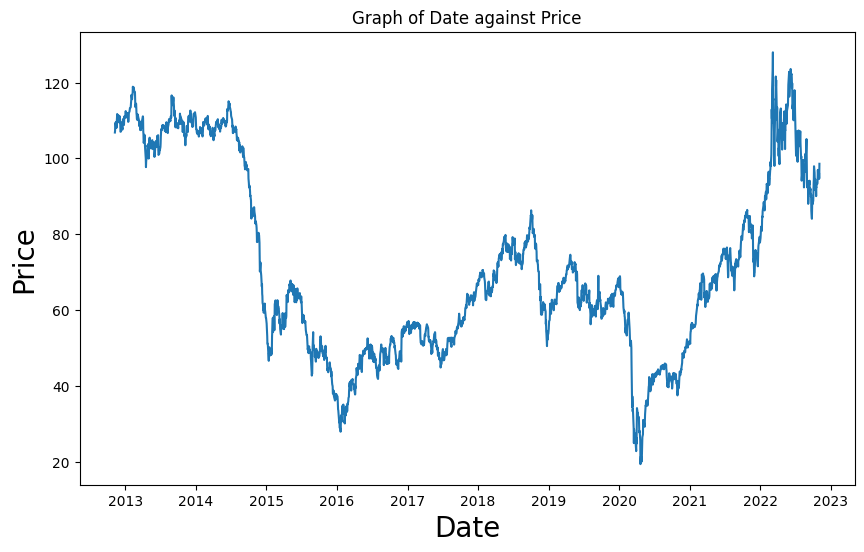

In [13]:
#Visualize the data(date against Price)

plt.figure(figsize=(10, 6), dpi=100)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title("Graph of Date against Price")


plt.plot(df1.index, df['Close/Last'])
plt.savefig('rf_data_plot.png')



In [14]:
# Drop unnecessary columns from the original dataset to form train and test set.

X = df.drop(['Close/Last', 'Date'], axis =1)
Y = df['Close/Last']
date = df['Date'].apply(str_to_datetime)

In [15]:
#Split "Date" column into train(80%), validation(10%) and test(10%). this is used for visualization.

dtrain, dtest = np.split(date, [int(len(date) * 0.8)])
dval, dtest = np.split(dtest, [int(len(dtest) * 0.5)])

In [19]:
#Split data into train set(80%), validation set(10%), and test set(10%). This is used to train the model. 

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state=42,shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size =0.5, random_state=42,shuffle=False)

Training the Model

In [53]:
#Train model with Random Forest Regressor.
model = RandomForestRegressor(n_estimators=100, 
                            max_depth=3,#None,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)

In [54]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                      random_state=0)

Model Evaluation

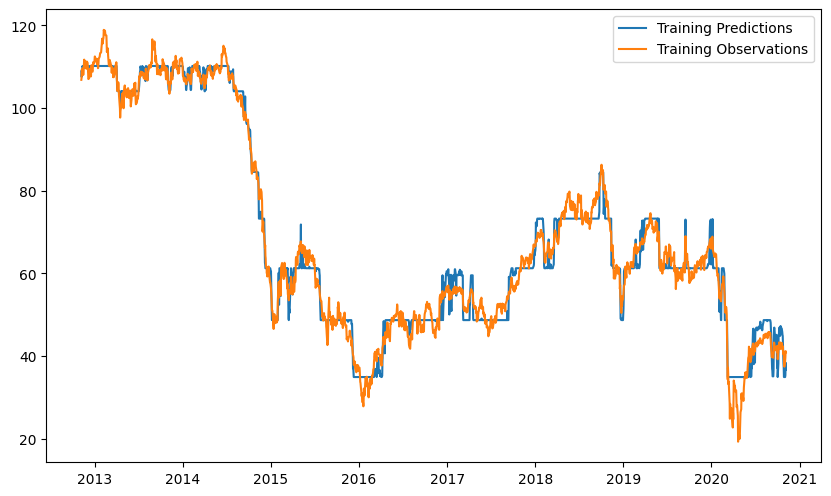

In [55]:
#Predict on the train data set and visualize

train_prediction = model.predict(x_train)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dtrain, train_prediction)
plt.plot(dtrain, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

plt.savefig("Train_pred_observe.png")

In [56]:
# Find train score which is the coefficient of determinant.
train_score = r2_score(y_train, train_prediction)
train_score

0.985479663934768

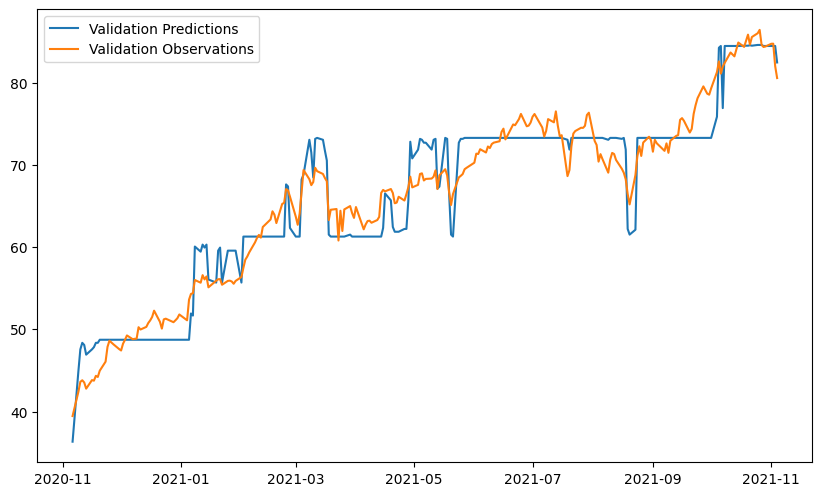

In [57]:
#Predict on the Validation data set and visualize

Validation_predictions = model.predict(x_val)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dval, Validation_predictions)
plt.plot(dval, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

plt.savefig("Val_pred_observe.png")

In [58]:
# Find validation score which is the Coefficient of determination
from sklearn.metrics import r2_score
val_score = r2_score(y_val, Validation_predictions)
val_score

0.9320499852530085

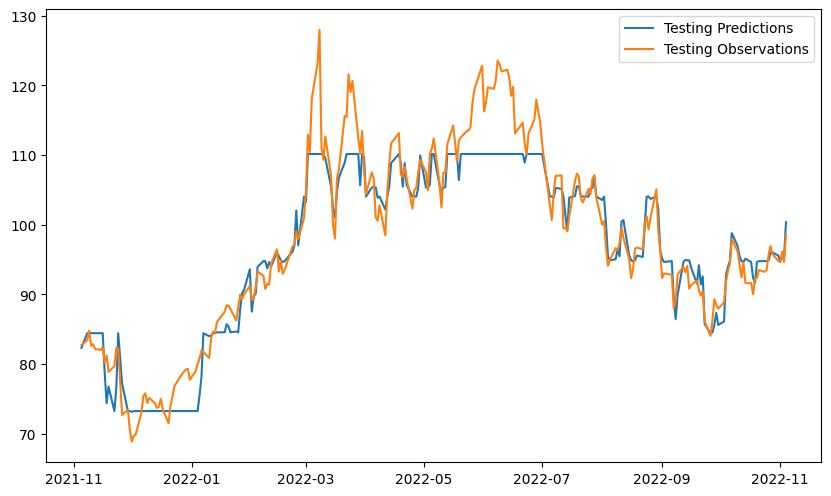

In [59]:
#Predict on the test data set and visualize

test_predictions = model.predict(x_test)

plt.figure(figsize=(10, 6), dpi=100)

plt.plot(dtest, test_predictions)
plt.plot(dtest, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

plt.savefig("test_pred_observe.png")

In [60]:
# Find test score which is the Coefficient of determination
test_score= r2_score(y_test, test_predictions)
test_score

0.9088212740651079

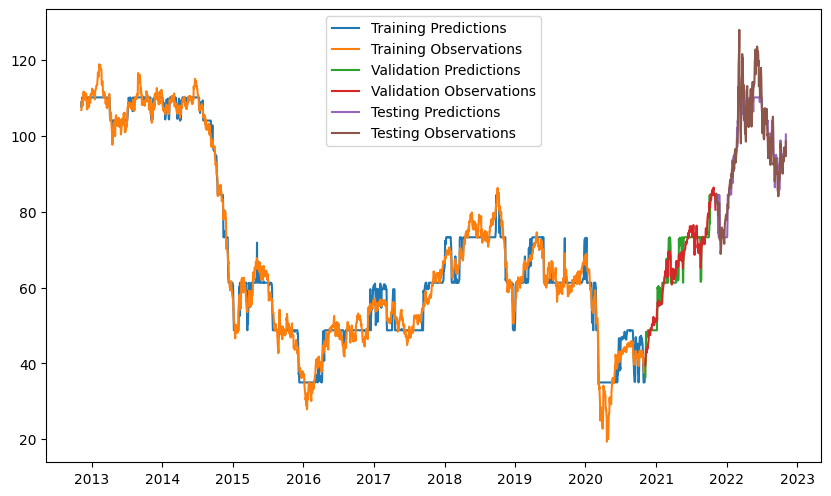

In [61]:
# Visualize the Combined plot of the train, validation and test set against their predicted values

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(dtrain, train_prediction)
plt.plot(dtrain, y_train)
plt.plot(dval, Validation_predictions)
plt.plot(dval, y_val)
plt.plot(dtest, test_predictions)
plt.plot(dtest, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])
plt.savefig("Combined plot.png")

In [62]:
# Print Score

print(train_score, val_score, test_score)


0.985479663934768 0.9320499852530085 0.9088212740651079


Random Forest Tree of the Dataset.

In [63]:
feature_names = ['Volume', 'Open', 'High', 'Low']
target_name = ['Close']

[Text(0.5, 0.875, 'Low <= 80.16\nsquared_error = 630.915\nsamples = 1268\nvalue = 69.754'),
 Text(0.25, 0.625, 'High <= 57.495\nsquared_error = 143.739\nsamples = 937\nvalue = 55.712'),
 Text(0.125, 0.375, 'High <= 44.23\nsquared_error = 54.774\nsamples = 493\nvalue = 46.514'),
 Text(0.0625, 0.125, 'squared_error = 35.495\nsamples = 138\nvalue = 36.809'),
 Text(0.1875, 0.125, 'squared_error = 13.176\nsamples = 355\nvalue = 50.171'),
 Text(0.375, 0.375, 'Low <= 67.46\nsquared_error = 40.248\nsamples = 444\nvalue = 66.125'),
 Text(0.3125, 0.125, 'squared_error = 9.264\nsamples = 291\nvalue = 62.378'),
 Text(0.4375, 0.125, 'squared_error = 13.528\nsamples = 153\nvalue = 74.029'),
 Text(0.75, 0.625, 'Low <= 97.46\nsquared_error = 50.339\nsamples = 331\nvalue = 106.294'),
 Text(0.625, 0.375, 'Open <= 91.67\nsquared_error = 32.995\nsamples = 37\nvalue = 89.058'),
 Text(0.5625, 0.125, 'squared_error = 3.74\nsamples = 24\nvalue = 85.143'),
 Text(0.6875, 0.125, 'squared_error = 4.126\nsamples =

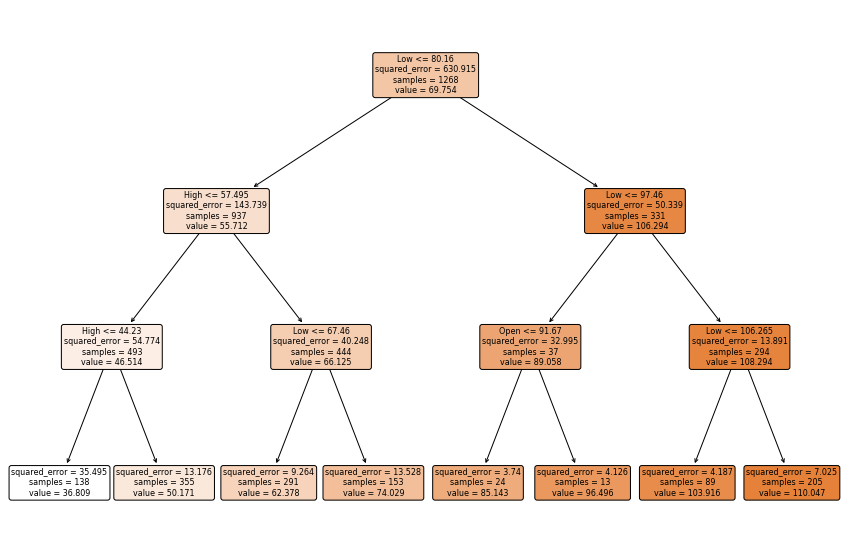

In [64]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=feature_names,
          class_names=target_name, 
          filled=True, impurity=True, 
          rounded=True)